In [2]:
import pandas as pd

This Project is predicting stocks for Apple company with error less than 5% using LSTM Networks. I have not used pre-built models. I have trained LSTM NN models for Apple Company listed below

Loading the Dataset..


In [3]:
df=pd.read_csv('AAPL.csv')

In [4]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [5]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [6]:
df1=df.reset_index()['close']

In [7]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

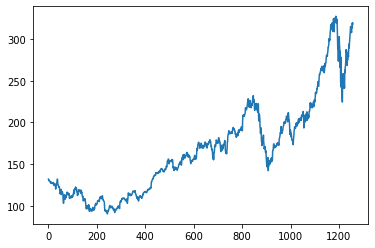

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np

In [10]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

Normalising the Data..


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


Splitting the dataset into Training and Testing Data..

In [13]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:1],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(817, 441)

In [15]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [16]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

Creating Dataset...

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [20]:
y_train

array([0.0873934 , 0.09030651, 0.09891919, 0.09887697, 0.10622309,
       0.1213375 , 0.10529427, 0.10221228, 0.12213966, 0.12745926,
       0.1231107 , 0.1302035 , 0.13607194, 0.13366546, 0.1291058 ,
       0.12969687, 0.12762813, 0.1115849 , 0.10879845, 0.1071519 ,
       0.09288187, 0.10062906, 0.09858144, 0.11378029, 0.12007093,
       0.12226632, 0.11572237, 0.12049312, 0.1169045 , 0.11597568,
       0.11804441, 0.11399139, 0.10951617, 0.10495651, 0.1211264 ,
       0.11795998, 0.11774888, 0.10672971, 0.10905176, 0.09642827,
       0.09347294, 0.08507135, 0.08865997, 0.07869628, 0.06624166,
       0.07173014, 0.07130795, 0.07713417, 0.07468547, 0.06957697,
       0.07768302, 0.07168792, 0.0629908 , 0.06337077, 0.05222494,
       0.04373892, 0.02579583, 0.027949  , 0.03457739, 0.04061471,
       0.02976442, 0.03875707, 0.02866672, 0.02668243, 0.02723128,
       0.02516254, 0.04677869, 0.03841932, 0.04074137, 0.01300346,
       0.01583214, 0.02955332, 0.02571139, 0.01747868, 0.02537

In [21]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

Models for Stock Prediction...

In [25]:
from keras.optimizers import RMSprop
def bidirectional_model(learn_rate):
    model = Sequential()
    model.add(Bidirectional(LSTM(32),input_shape=(100,1)))
    model.add(Dense(1))
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


def stacked_model(learn_rate):
    model = Sequential()
    model.add(LSTM(32,return_sequences=True,input_shape=(100,1)))
    model.add(LSTM(32))
    model.add(Dense(1))
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

Pushing models in the 'models 'array... 

In [26]:
models =[]

models.append(("Bidirectional",bidirectional_model))
models.append(("Stacked",stacked_model))

Choosing the Best Model with most appropriate Learning Rate....

In [27]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
learn_rates = [0.01,0.001,0.0001]
j=0
i=0
c=10000
rows = 4
cols = 3
model = []
model = [0 for i in range(6)] 
q = []
q=[0 for i in range(6)] 
learn_rate=0
model_name=""
for model_item in models:
    for lr in learn_rates:
        model[i] = model_item[1](lr)
        model[i].summary()
        model[i].fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

        train_predict=model[i].predict(X_train)
        test_predict=model[i].predict(X_test)
        train_predict=scaler.inverse_transform(train_predict)
        test_predict=scaler.inverse_transform(test_predict)
        c=math.sqrt(mean_squared_error(y_train,train_predict))
        q[i]=c
                          
        
        i=i+1
    

# print("Best Model for AAPL is ".format(model_name))
# print("Best learning rate is {}".format(learn_rate))
# print("Minimum mean squared error is {}".format(c))
        

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               8704      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


C:\Users\Aviral\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 4s 88ms/step - loss: 0.0508 - val_loss: 0.0302
Epoch 2/100
12/12 [==============================] - 0s 35ms/step - loss: 0.0030 - val_loss: 0.0104
Epoch 3/100
12/12 [==============================] - 0s 36ms/step - loss: 0.0026 - val_loss: 0.0135
Epoch 4/100
12/12 [==============================] - 0s 36ms/step - loss: 0.0036 - val_loss: 0.0077
Epoch 5/100
12/12 [==============================] - 0s 36ms/step - loss: 0.0032 - val_loss: 0.0078
Epoch 6/100
12/12 [==============================] - 0s 36ms/step - loss: 0.0029 - val_loss: 0.0076
Epoch 7/100
12/12 [==============================] - 0s 36ms/step - loss: 0.0033 - val_loss: 0.0065
Epoch 8/100
12/12 [==============================] - 0s 36ms/step - loss: 0.0032 - val_loss: 0.0233
Epoch 9/100
12/12 [==============================] - 0s 35ms/step - loss: 0.0019 - val_loss: 0.0387
Epoch 10/100
12/12 [==============================] - 0s 35ms/step - loss: 0.0015 - val_loss: 0.0155
Epoch 11/10

C:\Users\Aviral\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 3s 85ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 2/100
12/12 [==============================] - 0s 34ms/step - loss: 0.0011 - val_loss: 0.0067
Epoch 3/100
12/12 [==============================] - 0s 34ms/step - loss: 0.0010 - val_loss: 0.0164
Epoch 4/100
12/12 [==============================] - 0s 34ms/step - loss: 9.6882e-04 - val_loss: 0.0036
Epoch 5/100
12/12 [==============================] - 0s 34ms/step - loss: 7.9954e-04 - val_loss: 0.0031
Epoch 6/100
12/12 [==============================] - 0s 33ms/step - loss: 8.7499e-04 - val_loss: 0.0029
Epoch 7/100
12/12 [==============================] - 0s 33ms/step - loss: 5.5303e-04 - val_loss: 0.0045
Epoch 8/100
12/12 [==============================] - 0s 34ms/step - loss: 6.2660e-04 - val_loss: 0.0020
Epoch 9/100
12/12 [==============================] - 0s 33ms/step - loss: 5.6531e-04 - val_loss: 0.0021
Epoch 10/100
12/12 [==============================] - 0s 34ms/step - loss: 4.4814e-04 - 

C:\Users\Aviral\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 3s 82ms/step - loss: 0.0186 - val_loss: 0.1088
Epoch 2/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0108 - val_loss: 0.0773
Epoch 3/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0066 - val_loss: 0.0533
Epoch 4/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0040 - val_loss: 0.0337
Epoch 5/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0026 - val_loss: 0.0214
Epoch 6/100
12/12 [==============================] - 0s 34ms/step - loss: 0.0020 - val_loss: 0.0161
Epoch 7/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0016 - val_loss: 0.0094
Epoch 8/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0011 - val_loss: 0.0069
Epoch 9/100
12/12 [==============================] - 0s 32ms/step - loss: 8.3247e-04 - val_loss: 0.0051
Epoch 10/100
12/12 [==============================] - 0s 32ms/step - loss: 6.2066e-04 - val_loss: 0.0032
Epo

C:\Users\Aviral\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 4s 96ms/step - loss: 0.7682 - val_loss: 0.0688
Epoch 2/100
12/12 [==============================] - 1s 49ms/step - loss: 0.0035 - val_loss: 0.0282
Epoch 3/100
12/12 [==============================] - 1s 50ms/step - loss: 0.0041 - val_loss: 0.0286
Epoch 4/100
12/12 [==============================] - 1s 75ms/step - loss: 0.0029 - val_loss: 0.0413
Epoch 5/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0040 - val_loss: 0.0299
Epoch 6/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0036 - val_loss: 0.0743
Epoch 7/100
12/12 [==============================] - 1s 58ms/step - loss: 0.0030 - val_loss: 0.0387
Epoch 8/100
12/12 [==============================] - 1s 55ms/step - loss: 0.0032 - val_loss: 0.0710
Epoch 9/100
12/12 [==============================] - 1s 55ms/step - loss: 0.0037 - val_loss: 0.0336
Epoch 10/100
12/12 [==============================] - 1s 55ms/step - loss: 0.0027 - val_loss: 0.0338
Epoch 11/10

C:\Users\Aviral\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 4s 99ms/step - loss: 0.0107 - val_loss: 0.0117
Epoch 2/100
12/12 [==============================] - 1s 49ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 3/100
12/12 [==============================] - 1s 51ms/step - loss: 0.0014 - val_loss: 0.0139
Epoch 4/100
12/12 [==============================] - 1s 48ms/step - loss: 0.0012 - val_loss: 0.0087
Epoch 5/100
12/12 [==============================] - 1s 48ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 6/100
12/12 [==============================] - 1s 48ms/step - loss: 6.5689e-04 - val_loss: 0.0053
Epoch 7/100
12/12 [==============================] - 1s 52ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 8/100
12/12 [==============================] - 1s 56ms/step - loss: 5.5990e-04 - val_loss: 0.0030
Epoch 9/100
12/12 [==============================] - 1s 55ms/step - loss: 8.4853e-04 - val_loss: 0.0067
Epoch 10/100
12/12 [==============================] - 1s 56ms/step - loss: 9.9639e-04 - val_loss: 0.

C:\Users\Aviral\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 5s 137ms/step - loss: 0.0704 - val_loss: 0.4288
Epoch 2/100
12/12 [==============================] - 1s 71ms/step - loss: 0.0530 - val_loss: 0.3550
Epoch 3/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0403 - val_loss: 0.2801
Epoch 4/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0285 - val_loss: 0.2086
Epoch 5/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0184 - val_loss: 0.1442
Epoch 6/100
12/12 [==============================] - 1s 63ms/step - loss: 0.0111 - val_loss: 0.0888
Epoch 7/100
12/12 [==============================] - 1s 63ms/step - loss: 0.0067 - val_loss: 0.0453
Epoch 8/100
12/12 [==============================] - 1s 62ms/step - loss: 0.0048 - val_loss: 0.0257
Epoch 9/100
12/12 [==============================] - 1s 59ms/step - loss: 0.0036 - val_loss: 0.0156
Epoch 10/100
12/12 [==============================] - 1s 66ms/step - loss: 0.0025 - val_loss: 0.0089
Epoch 11/1

In [28]:
print(model)

[<keras.engine.sequential.Sequential object at 0x0000027F6E883B80>, <keras.engine.sequential.Sequential object at 0x0000027F7C65B910>, <keras.engine.sequential.Sequential object at 0x0000027F7D7BC250>, <keras.engine.sequential.Sequential object at 0x0000027F0A8EF3D0>, <keras.engine.sequential.Sequential object at 0x0000027F11405750>, <keras.engine.sequential.Sequential object at 0x0000027F114FCA60>]


In [29]:
print(q)

[144.67435457704687, 143.21719606140388, 141.75288392819817, 143.63776185465346, 142.96995978153694, 142.51937460777881]


In [30]:
temp = min(q)
p=0
for idx in range(0, len(q)):
    if temp == q[idx]:
        p=idx

Minimum Error..

In [31]:
print(temp)

141.75288392819817


In [32]:
print(p)

2


Best Model...

In [33]:
model_name=models[int(p/3)][0]
print(model_name)

Bidirectional


Best Learning Rate...

In [34]:
learn_rate=learn_rates[p%3]
learn_rate

0.0001

In [35]:
print(learn_rate)

0.0001


In [36]:
model[p].summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 64)               8704      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


In [37]:
# import tensorflow as tf

In [38]:
tf.__version__

'2.10.0'

In [39]:
train_predict=model[p].predict(X_train)
test_predict=model[p].predict(X_test)

11/11 [==============================] - 0s 7ms/step


In [40]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Training Predict Error....

In [41]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.75288392819817

Testing Predict Error....

In [42]:
math.sqrt(mean_squared_error(ytest,test_predict))

237.98829456329963

Plotting the Training and Testing Result.....

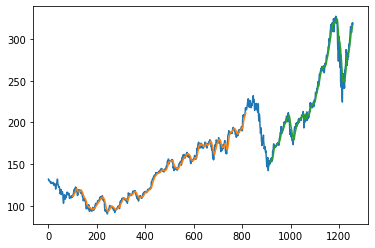

In [43]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
train_predict.shape

(716, 1)

In [45]:
y_t2=y_train.reshape(y_train.shape[0],1)

In [46]:
y_t2.shape

(716, 1)

In [47]:
y_t2=scaler.inverse_transform(y_t2)

In [48]:
from sklearn.metrics import r2_score

Best possible Training score....

In [49]:
r2_score(y_t2,train_predict)

0.9874776045865374

In [50]:
y_t3=ytest.reshape(ytest.shape[0],1)

In [51]:
y_t3.shape

(340, 1)

In [52]:
y_t3=scaler.inverse_transform(y_t3)

Best possible Testing score....

In [53]:
r2_score(y_t3,test_predict)

0.9705117611433354

In [54]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [55]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [56]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [57]:
len(test_data)

441

In [58]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [59]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model[p].predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model[p].predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.96207416]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [60]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [61]:
len(df1)


1258

Predicting Future Stock Values...

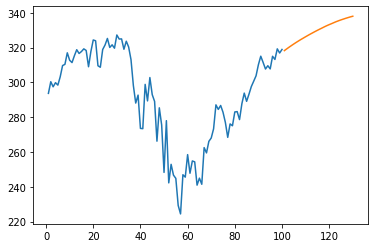

In [62]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


predicted Stock Prediction...

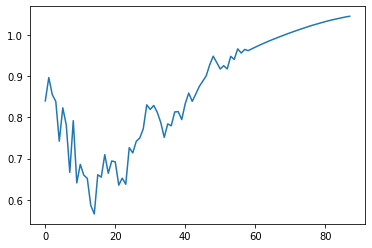

In [63]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [64]:
df3=scaler.inverse_transform(df3).tolist()